In [30]:
import librosa
import numpy as np
from scipy import signal

#load audio
y, sr = librosa.core.load('MVMNT1.wav', sr=None)

#compute stft and cqt
stft = np.abs(librosa.stft(y))
cqt = np.abs(librosa.cqt(y, sr))

#sum the frequency bins
stft_loud = np.sum(stft,axis=0)
cqt_loud = np.sum(cqt,axis=0)

#normalize
stft_loud_norm = 2*(stft_loud/np.linalg.norm(stft_loud)) #weight stft more heavily
cqt_loud_norm = (cqt_loud/np.linalg.norm(cqt_loud)) 

#add both and normalize
loud = stft_loud_norm + cqt_loud_norm
loud_norm = loud/np.linalg.norm(loud)

#downsample to 30fps with fourier method
x = signal.resample(loud_norm, int(len(y)*30/44100))

#write to file
f = open("loudness.txt", "w")
for i in range(x.shape[0]):
    f.write(str(x[i]))
    f.write(",")
f.close()

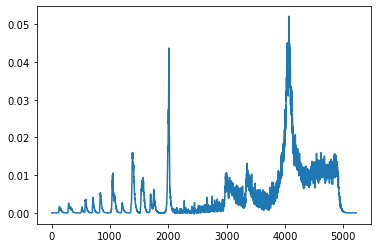

In [32]:
import matplotlib.pyplot as plt
plt.plot(x)